## Build trackster graphs

Use an edge-building algorithm to convert the tracksters into graph representations and visualize the results

In [1]:
import uproot
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

from itertools import islice
from utils.graph_utils import load_pairs, load_tree
from utils.plotting_utils import plot_graph_3D

### Load the tracksters

In [2]:
file_name = "tracksters_ds_pion.root"
file = uproot.open(file_name)
file.classnames()

{'tracksters;1': 'TTree'}

In [3]:
tracksters = uproot.open({file_name: 'tracksters'})

vx = tracksters['vertices_x'].array()
vy = tracksters['vertices_y'].array()
vz = tracksters['vertices_z'].array()
energy = tracksters['vertices_energy'].array()
tl = tracksters['trackster_label'].array()

Split into complete and incomplete tracksters

In [4]:
complete_idx = np.where(tl == 1)[0]
incomplete_idx = np.where(tl == 0)[0]
print("Complete tracksters:", complete_idx)
print("Inomplete tracksters:", incomplete_idx)

Complete tracksters: [540, 541, 542, 543, 544, 545, 546, ... 56082, 56083, 56084, 56085, 56086, 56087]
Inomplete tracksters: [0, 1, 2, 3, 4, 5, 6, 7, ... 56041, 56042, 56043, 56044, 56045, 56046, 56047, 56048]


Plot complete and incomplete tracksters in 3D

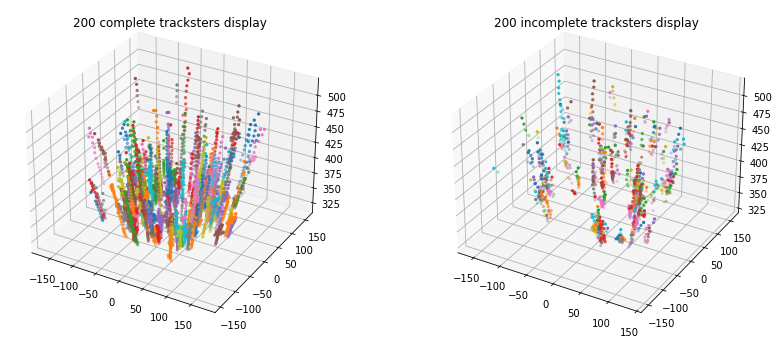

In [5]:
i = 0
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')
ax.set_title('200 complete tracksters display', x=0.5, y=1)
for x, y, z, l in zip(vx, vy, vz, tl):
    if l == 1:
        i+=1
        ax.scatter(x, y, z, s=5)
    if i == 200:
        break

i = 0
ax = fig.add_subplot(122, projection='3d')
ax.set_title('200 incomplete tracksters display', x=0.5, y=1)
for x, y, z, l in zip(vx, vy, vz, tl):
    if l == 0:
        i+=1
        ax.scatter(x, y, z, s=5)
    if i == 200:
        break

### Load tracksters into graphs

In [6]:
# get first 1000 graphs
samples = list(islice(load_tree(tracksters, N=1), 1000))

2D and 3D plot for a complete an an incomplete

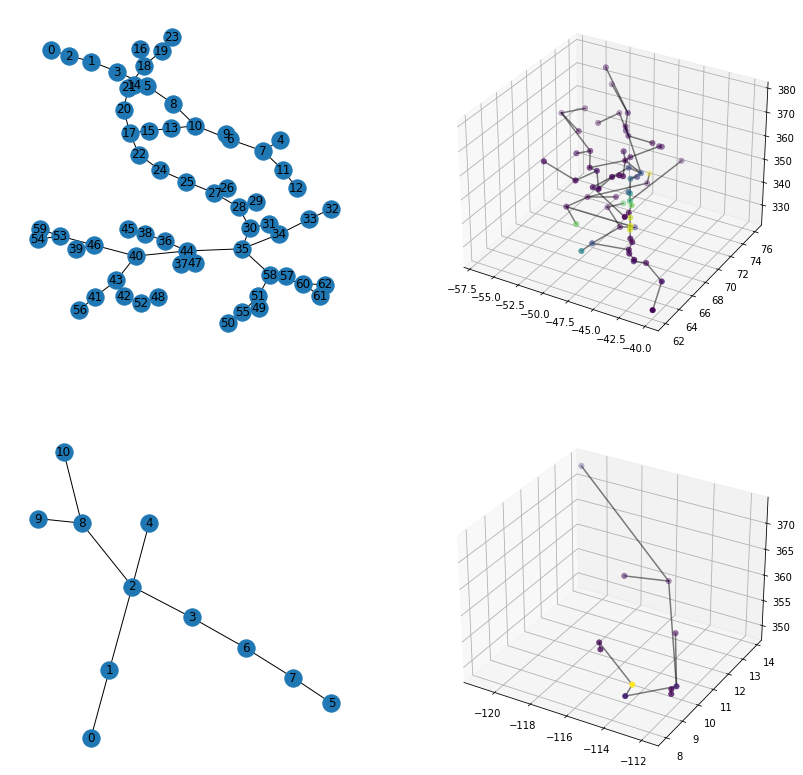

In [7]:
G, label, te = samples[complete_idx[0]]

fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, projection='3d')

nx.draw(G, with_labels=True, ax=ax1)
plot_graph_3D(G, te, ax=ax2)

iG, ilabel, ite = samples[incomplete_idx[6]]
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224, projection='3d')

nx.draw(iG, with_labels=True, ax=ax3)
plot_graph_3D(iG, ite, ax=ax4)

## Visualize trackster pairs

In [35]:
pairs_file = "data/trackster_pairs_10ke_photon.root"
pairs_tree = uproot.open({pairs_file: 'tracksters'})

In [36]:
# Take first 10 pairs
pairs = list(islice(load_pairs(pairs_tree, N=1), 10))

Plot the trackster and it's candidate in 2D and 3D

Match: True, Event: 2, fileId: 100


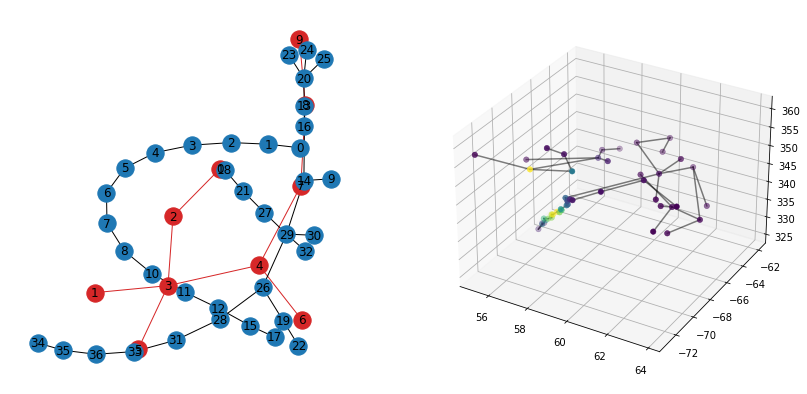

In [41]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

TG, CG, pL, pE, pF = pairs[3]
print(f"Match: {bool(pL)}, Event: {pE}, fileId: {pF}")

nx.draw(TG, with_labels=True, ax=ax1, node_color="tab:red", edge_color="tab:red")
nx.draw(CG, with_labels=True, ax=ax1)

plot_graph_3D(TG, [e for _, e in TG.nodes("energy")], ax=ax2)
plot_graph_3D(CG, [e for _, e in CG.nodes("energy")], ax=ax2)